In [2]:
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
results = {
    "KICS": {
        "score": 41,
        "avg": 4.56,
        "breakdown": {
            "INFO": 1,
            "LOW": 1,
            "MEDIUM": 6,
            "HIGH": 1,
            "CRITICAL": 0
        }
    },
    "Trivy": {
        "score": 64,
        "avg": 3.76,
        "breakdown": {
            "INFO": 0,
            "LOW": 13,
            "MEDIUM": 3,
            "HIGH": 0,
            "CRITICAL": 1
        }
    },
    "Checkov": {
        "score": 181,
        "avg": 4.89,
        "breakdown": {
            "INFO": 0,
            "LOW": 2,
            "MEDIUM": 35,
            "HIGH": 0,
            "CRITICAL": 0
        }
    },
}

In [3]:
vulnerabilities = {
    "App Service Authentication Disabled": ["Checkov", "KICS", "Trivy"],
    "App Service Client Certificate Disabled": ["Checkov", "KICS", "Trivy"],
    "HTTP/2 Disabled in App Service": ["Checkov", "KICS", "Trivy"],
    "Key Vault Secret Expiration Missing": ["Checkov", "KICS", "Trivy"],
    "Key Vault Secret Content Type Missing": ["Checkov", "KICS", "Trivy"],
    "Key Vault Public Network Access": ["Checkov", "Trivy"],
    "Managed Identity Disabled": ["Checkov", "KICS", "Trivy"]
}
tools = ["Checkov", "KICS", "Trivy"]

In [4]:
data = []
for vuln, detected_by in vulnerabilities.items():
  row = [1 if tool in detected_by else 0 for tool in tools]
  data.append(row)
df_overlap = pd.DataFrame(data, columns=tools, index=vulnerabilities.keys())

In [1]:
# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(df_overlap, cmap="Oranges", aspect="auto")

plt.xticks(range(len(tools)), tools)
plt.yticks(range(len(vulnerabilities)), df_overlap.index)

for i in range(len(vulnerabilities)):
    for j in range(len(tools)):
        plt.text(j, i, df_overlap.iloc[i, j],
                 ha='center', va='center', color="red")

plt.colorbar(label="Detected (1) / Not Detected (0)")
plt.title("Overlapping Coverage of Vulnerabilities by Tools")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

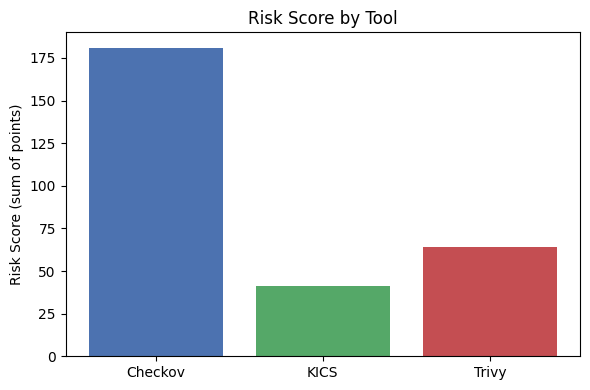

In [16]:
plt.figure(figsize=(6, 4))
scores = [results[t]["score"] for t in tools]
plt.bar(tools, scores, color=["#4C72B0", "#55A868", "#C44E52"])
plt.title("Risk Score by Tool")
plt.ylabel("Risk Score (sum of points)")
plt.tight_layout()
plt.show()

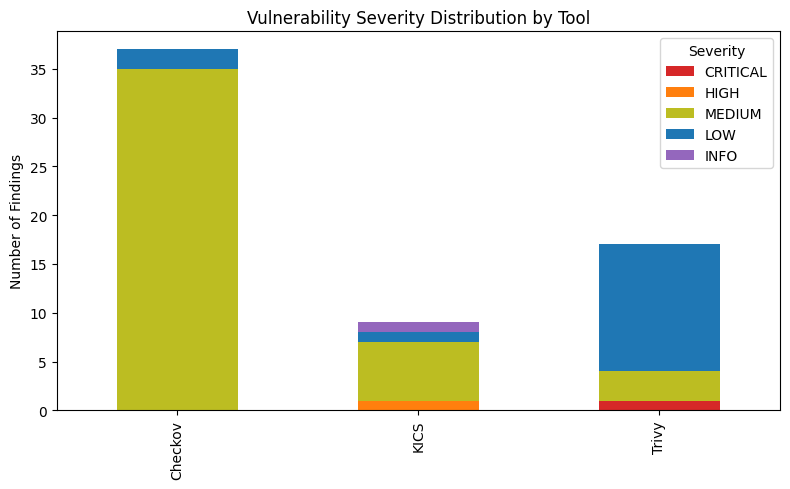

In [15]:
categories = ["CRITICAL", "HIGH", "MEDIUM", "LOW", "INFO"]
breakdown_df = pd.DataFrame({t: results[t]["breakdown"] for t in tools}).T[categories]

breakdown_df.plot(
    kind="bar", stacked=True, figsize=(8, 5),
    color=["#D62728", "#FF7F0E", "#BCBD22", "#1F77B4", "#9467BD"]
)
plt.title("Vulnerability Severity Distribution by Tool")
plt.ylabel("Number of Findings")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()